In [15]:
import medmnist
import matplotlib.pyplot as plt
from torchvision import transforms

In [5]:
data = medmnist.dataset.RetinaMNIST(split="train",download=True, root="/home/laurenz/Documents/jku/ophthalmology/data")

  0%|          | 0/3291041 [00:00<?, ?it/s]

In [6]:
data

Dataset RetinaMNIST (retinamnist)
    Number of datapoints: 1080
    Root location: /home/laurenz/Documents/jku/ophthalmology/data
    Split: train
    Task: ordinal-regression
    Number of channels: 3
    Meaning of labels: {'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'}
    Number of samples: {'train': 1080, 'val': 120, 'test': 400}
    Description: The RetinaMNIST is based on the DeepDRiD challenge, which provides a dataset of 1,600 retina fundus images. The task is ordinal regression for 5-level grading of diabetic retinopathy severity. We split the source training set with a ratio of 9:1 into training and validation set, and use the source validation set as the test set. The source images of 3×1,736×1,824 are center-cropped and resized into 3×28×28.
    License: CC BY 4.0

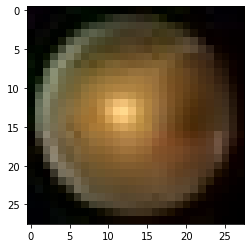

In [12]:
plt.imshow(data[3][0])

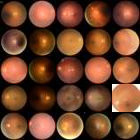

In [14]:
data.montage(length=5)

In [16]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[.5], std=[.5])
])

data = medmnist.dataset.RetinaMNIST(
    split="train",
    download=True, 
    root="/home/laurenz/Documents/jku/ophthalmology/data",
    transform = data_transform
)

Using downloaded and verified file: /home/laurenz/Documents/jku/ophthalmology/data/retinamnist.npz


In [21]:
data[0][0].std(dim=[1,2])

tensor([0.4247, 0.2977, 0.1750])

In [22]:
data[0][0].mean(dim=[1,2])

tensor([-0.4140, -0.6062, -0.7756])